In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARMA

In [2]:
data = pd.read_csv("DK-DK2.csv")

In [33]:
data["datetime"] = pd.to_datetime(data['datetime'])
data["datetime"] = data["datetime"].dt.date

# Exploration and cleaning

In [34]:
data.head()

,datetime,timestamp,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,...,latest_forecasted_wind_x_avg,latest_forecasted_wind_y_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2014-12-11,1418338800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-12,1418342400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-12,1418346000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-12,1418349600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-12,1418353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Y = data.carbon_intensity_avg

In [6]:
dropColumns =[]
for i in range(len(data.columns)):
    if len(data[data.columns[i]].unique())< 5:
        dropColumns.append(data.columns[i])
        print(data.columns[i],i)

zone_name 2
carbon_intensity_discharge_avg 5
total_storage_avg 9
total_discharge_avg 10
production_sources 14
power_production_hydro_avg 20
power_production_nuclear_avg 21
power_production_geothermal_avg 25
power_production_unknown_avg 26
power_net_discharge_hydro_avg 49
power_net_import_SE-SE4_avg 53
latest_forecasted_power_net_import_SE_avg 65


In [7]:
data = data.drop(dropColumns,axis=1)

In [8]:
data.head()

,datetime,timestamp,carbon_intensity_avg,carbon_intensity_production_avg,carbon_intensity_import_avg,carbon_rate_avg,total_production_avg,total_import_avg,total_export_avg,total_consumption_avg,...,latest_forecasted_wind_x_avg,latest_forecasted_wind_y_avg,latest_forecasted_price_avg,latest_forecasted_production_avg,latest_forecasted_consumption_avg,latest_forecasted_power_net_import_DE_avg,latest_forecasted_power_net_import_DK-DK1_avg,latest_forecasted_power_net_import_SE-SE4_avg,latest_forecasted_production_solar_avg,latest_forecasted_production_wind_avg
0,2014-12-11 23:00:00+00:00,1418338800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-12 00:00:00+00:00,1418342400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-12 01:00:00+00:00,1418346000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,13.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-12 02:00:00+00:00,1418349600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-12 03:00:00+00:00,1418353200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


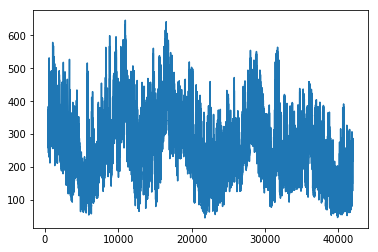

In [9]:
plt.plot(data["carbon_intensity_avg"])

In [10]:
data.isna().sum()

datetime                                             0
timestamp                                            0
carbon_intensity_avg                               486
carbon_intensity_production_avg                    485
carbon_intensity_import_avg                        551
carbon_rate_avg                                    512
total_production_avg                               485
total_import_avg                                   506
total_export_avg                                   506
total_consumption_avg                              511
power_origin_percent_fossil_avg                    486
power_origin_percent_renewable_avg                 486
power_production_biomass_avg                       485
power_production_coal_avg                          485
power_production_gas_avg                           485
power_production_oil_avg                           485
power_production_solar_avg                         485
power_production_wind_avg                          485
power_cons

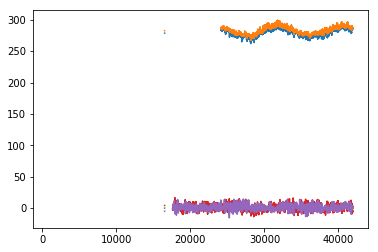

In [11]:
plt.plot(data.latest_forecasted_dewpoint_avg)
#plt.plot(data.latest_forecasted_solar_avg)
plt.plot(data.latest_forecasted_temperature_avg)
plt.plot(data.latest_forecasted_precipitation_avg)
plt.plot(data.latest_forecasted_wind_x_avg)
plt.plot(data.latest_forecasted_wind_y_avg)

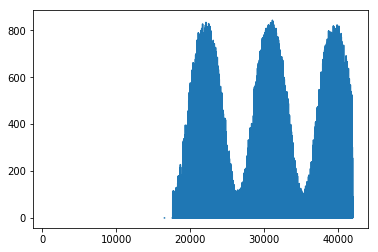

In [12]:
plt.plot(data.latest_forecasted_solar_avg)


In [13]:
dataClean = data.dropna()
dataClean = dataClean.reset_index(drop=True)

# Univariate Analysis

In [107]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


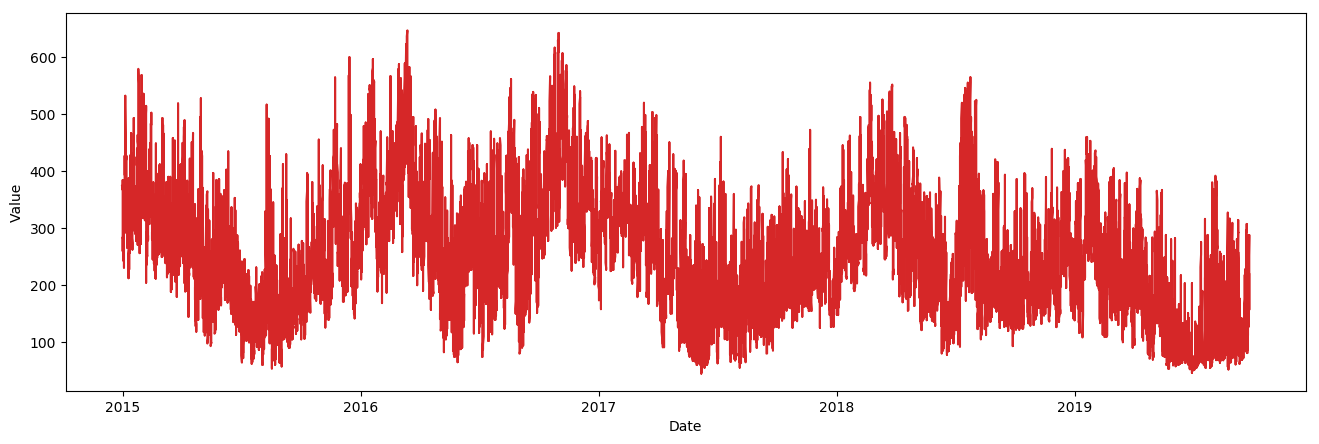

In [36]:
plot_df(data,x=data.datetime,y=data.carbon_intensity_avg)

In [42]:
univData = data[["datetime","carbon_intensity_avg"]]

In [56]:
univData = univData.dropna()
univData = univData.reset_index(drop=True)

In [58]:
u_training = univData[:33000]
u_test = univData[33000:]

In [60]:
model = ARMA(u_training["carbon_intensity_avg"], order=(2, 1))
model_fit = model.fit(disp=False)


In [61]:
print(model_fit.summary())

                               ARMA Model Results                               
Dep. Variable:     carbon_intensity_avg   No. Observations:                33000
Model:                       ARMA(2, 1)   Log Likelihood             -156733.041
Method:                         css-mle   S.D. of innovations             27.953
Date:                  Mon, 14 Oct 2019   AIC                         313476.083
Time:                          12:31:58   BIC                         313518.104
Sample:                               0   HQIC                        313489.505
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        265.7709      3.645     72.909      0.000     258.626     272.915
ar.L1.carbon_intensity_avg     0.6881      0.024     28.327      0.

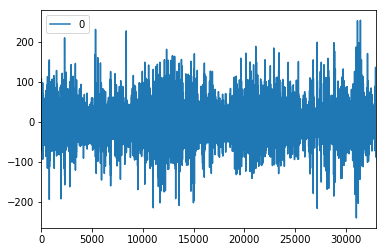

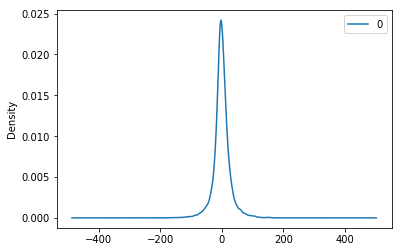

                  0
count  33000.000000
mean      -0.001576
std       27.958813
min     -239.704864
25%      -11.724682
50%       -0.885814
75%       11.481791
max      254.787901


In [65]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

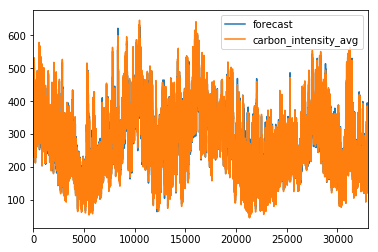

In [69]:
model_fit.plot_predict(dynamic=False)
plt.show()

In [102]:
yhat = model_fit.predict(start=33000, end = 41445)


[]

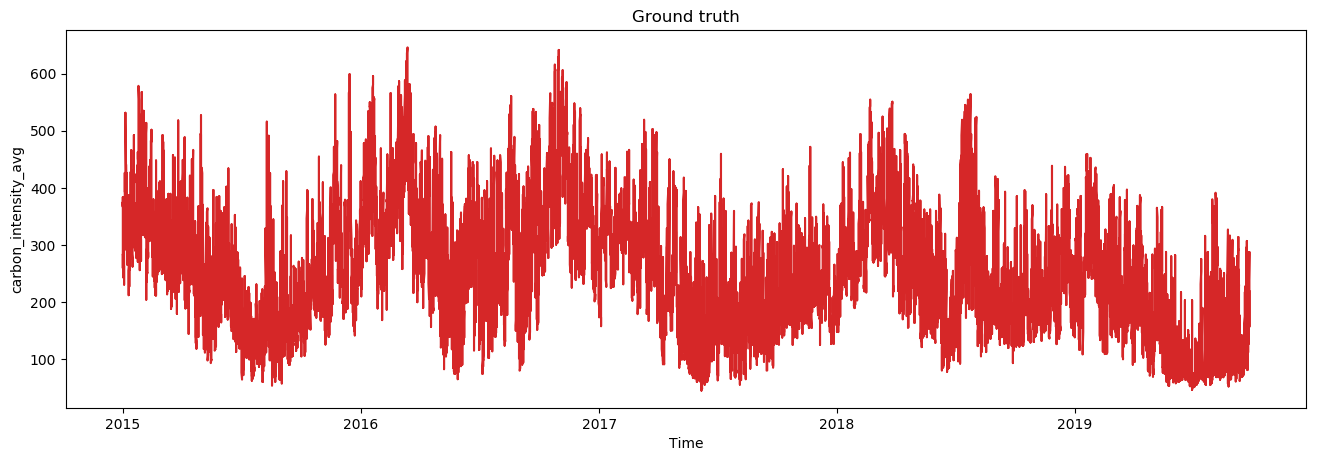

In [108]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],univData["carbon_intensity_avg"], color='tab:red')
plt.gca().set(title="Ground truth", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot()

In [103]:
mPredict = model_fit.predict() 
predCarb = mPredict.append(yhat)

[]

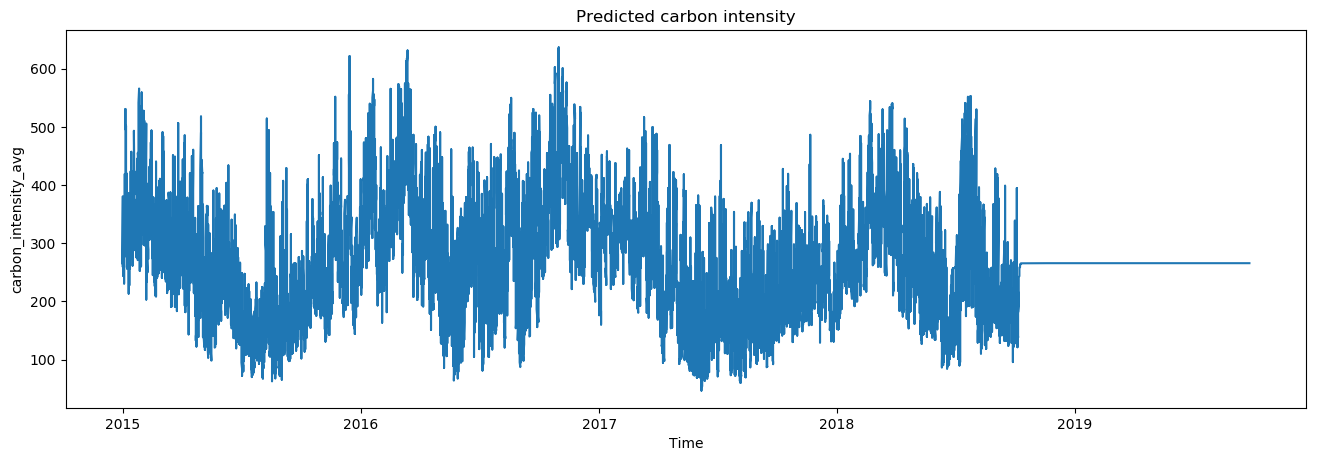

In [105]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],predCarb)
plt.gca().set(title="Predicted carbon intensity", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot()

# Holt Winter’s Exponential Smoothing

In [109]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [138]:
model = ExponentialSmoothing(u_training["carbon_intensity_avg"],seasonal="add",seasonal_periods=24)
model_fit = model.fit()

In [139]:
yhat = model_fit.predict(start =0, end = 41445)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

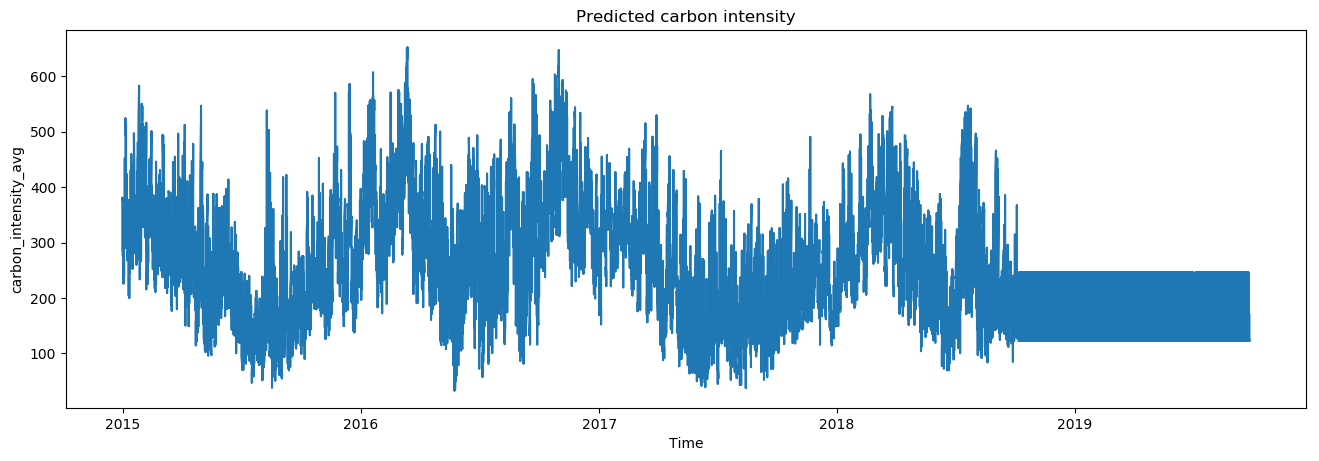

In [140]:
plt.figure(figsize=(16,5), dpi=100)
plt.plot(univData["datetime"],yhat)
plt.gca().set(title="Predicted carbon intensity", xlabel="Time", ylabel="carbon_intensity_avg")
plt.plot